In [1]:
import numpy as np
import h5py
from tqdm import tqdm
import pandas as pd
import random
import itertools as it
from pathlib import Path
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.serif": ["Computer Modern Roman"]})

In [2]:
file_paths = Path.cwd() / '../dataset/LCDB11_ER_CC18_compress.hdf5'
dataset_CC18 = h5py.File(file_paths , 'r')['error rate'][...] 
dataset_nofs, dataset_minmaxfs, dataset_standardfs = dataset_CC18[..., 0, 0], dataset_CC18[..., 1, 0], dataset_CC18[..., 2, 0]

In [3]:
LEARNER = 0

all_std_nofs = []
all_std_minmaxfs = []
all_std_standardfs = []
for DATASET in range(72):
    all_std_nofs.append(np.nanstd(dataset_nofs[DATASET, LEARNER, :, :, :, 1], axis=(0, 1)))
    all_std_minmaxfs.append(np.nanstd(dataset_minmaxfs[DATASET, LEARNER, :, :, :, 1], axis=(0, 1)))
    all_std_standardfs.append(np.nanstd(dataset_standardfs[DATASET, LEARNER, :, :, :, 1], axis=(0, 1)))

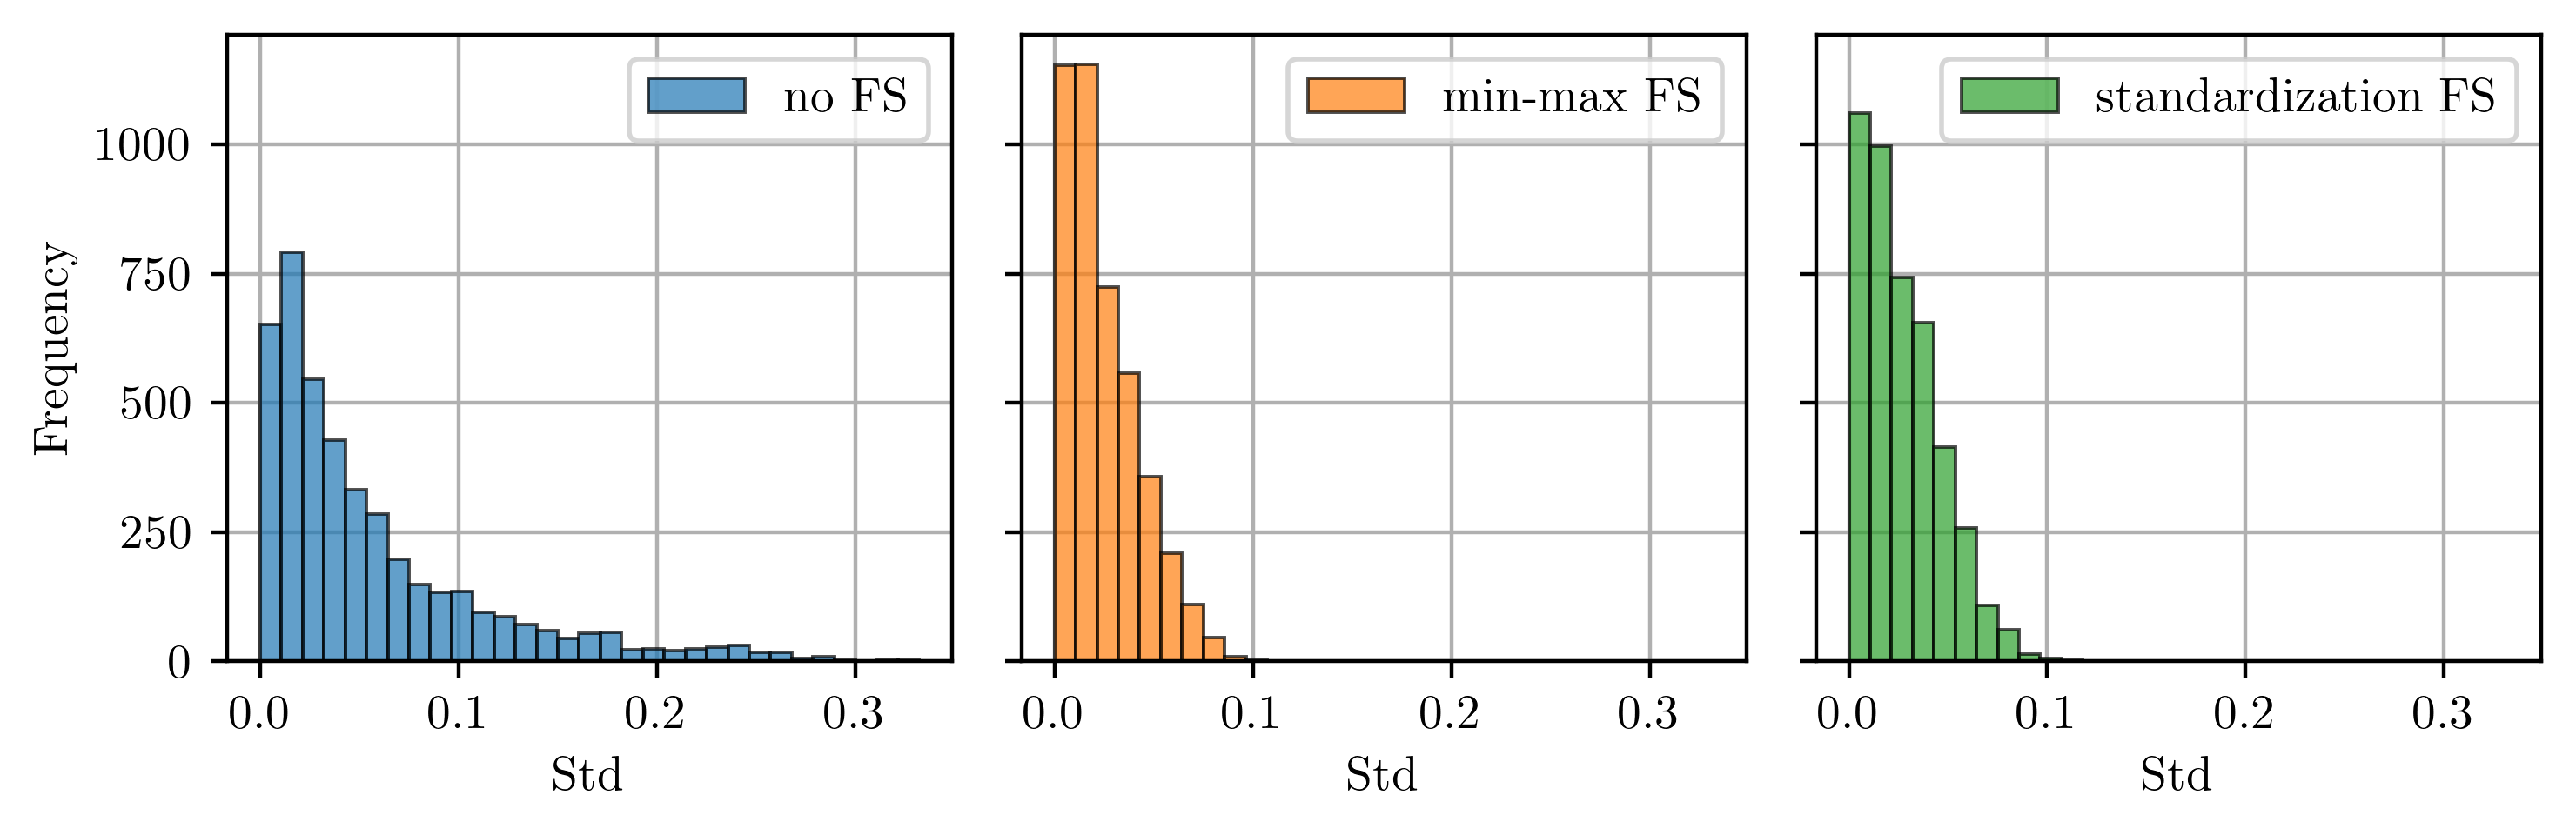

In [4]:
flat_all_std_nofs = np.hstack(all_std_nofs)
flat_all_std_minmaxfs = np.hstack(all_std_minmaxfs)
flat_all_std_standardfs = np.hstack(all_std_standardfs)

# compute a suitable bins
all_data = np.concatenate([flat_all_std_nofs, flat_all_std_minmaxfs, flat_all_std_standardfs])
min_value = np.nanmin(all_data)
max_value = np.nanmax(all_data)

bin_width = (max_value - min_value) / 30
bins = np.arange(min_value, max_value + bin_width, bin_width)

fig, axes = plt.subplots(1, 3, figsize=(7.5, 2.5), sharey=True, sharex=True, dpi=400)
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

axes[0].hist(flat_all_std_nofs, bins, color=default_colors[0], edgecolor='black', linewidth=0.7, alpha=0.7, label = 'no FS')
axes[0].set_xlabel("Std")
axes[0].set_ylabel("Frequency")
axes[0].legend()
axes[0].set_axisbelow(True)
axes[0].grid(True)

axes[1].hist(flat_all_std_minmaxfs, bins, color=default_colors[1], edgecolor='black', linewidth=0.7, alpha=0.7, label = 'min-max FS')
axes[1].set_xlabel("Std")
axes[1].legend()
axes[1].set_axisbelow(True)
axes[1].grid(True)

axes[2].hist(flat_all_std_standardfs, bins, color=default_colors[2], edgecolor='black', linewidth=0.7, alpha=0.7, label = 'standardization FS')
axes[2].set_xlabel("Std")
axes[2].legend()
axes[2].set_axisbelow(True)
axes[2].grid(True)

plt.tight_layout()
plt.show()